### Tasks:
##### Import libraries
##### Open the data 
##### Understand the data
##### Get necessary columns 
##### Clean the data
##### Answer the following questions


### Questions:

##### 1) Top 50 Cities with the most accidents?
##### 2) Does the temperature also cause the accidents?
##### 3) What day of the week is there the most accidents and why?
##### 4) What month has the most accidents and why?
##### 5) What year has the most accidents?
##### 6) Why is new york not recorded in this data?
##### 7) What was the longest accident recorded?
##### 8) Instead of the temperature, did the weather conditions cause some of the accidents?
##### 9) Were most accidents caused in the day or night?
##### 10) What is the Severity count? Show the severity of the accident, a number between 1 and 4, where 1 indicates the least  impact on traffic 

### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Open the data

In [2]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


### Understand the data

In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.shape

(1516064, 47)

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Gather necessary columns

In [8]:
new_df = df[['Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','City', 'Temperature(F)',]]

In [9]:
new_df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0


### Clean the data (If necessary)

In [10]:
new_df.isnull().sum()
### Temperature seems to have a lot of null values, maybe it was not recorded

Start_Time            0
End_Time              0
Start_Lat             0
Start_Lng             0
End_Lat               0
End_Lng               0
City                 83
Temperature(F)    43033
dtype: int64

In [11]:
null_data = new_df[new_df.isnull().any(axis=1)]
null_data
# There are too many null values so I will not be removing them

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
162,2016-02-14 17:40:17,2016-02-14 23:40:17,40.036600,-85.725620,40.038330,-85.719480,Anderson,NaN
164,2016-02-14 18:03:51,2016-02-15 00:03:51,40.049152,-85.682047,40.037440,-85.723430,Anderson,NaN
214,2016-02-16 08:59:39,2016-02-16 14:59:39,41.349650,-81.511460,41.314380,-81.513250,Macedonia,NaN
409,2016-02-23 16:00:41,2016-02-23 22:00:41,41.208579,-82.807829,41.208579,-82.807829,Bellevue,NaN
1128,2016-03-25 01:49:51,2016-03-25 07:49:51,37.942090,-122.475470,37.942064,-122.475324,Ross Valley,NaN
...,...,...,...,...,...,...,...,...
1515826,2019-08-23 12:23:00,2019-08-23 13:45:00,40.705620,-111.546730,40.703698,-111.546393,Park City,NaN
1515832,2019-08-23 13:23:00,2019-08-23 14:30:00,40.792697,-111.450383,40.787629,-111.454405,Coalville,NaN
1515887,2019-08-23 07:01:53,2019-08-23 07:30:47,47.244171,-122.335366,47.242776,-122.337015,Milton,NaN
1515920,2019-08-23 17:19:55,2019-08-24 03:11:30,44.119763,-121.317222,44.119050,-121.316760,Bend,NaN


## Q1
### Top 50 Cities with the most accidents?

In [12]:
new_df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0


In [13]:
city = new_df['City'].value_counts()[:50].sort_values(ascending=False).reset_index()

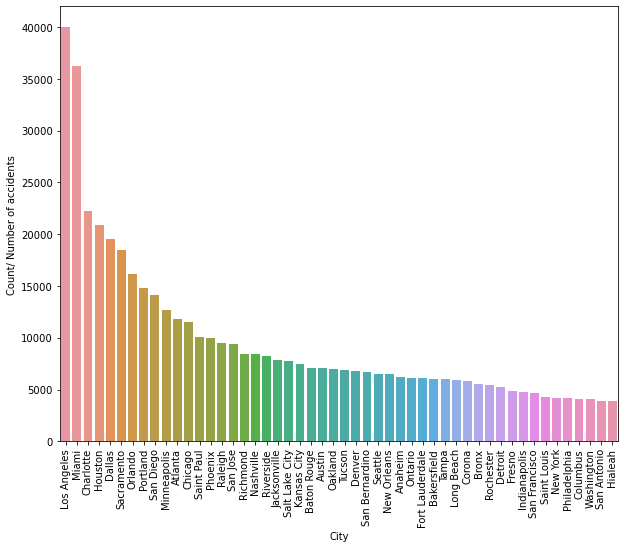

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=city['index'], y=city['City'])
plt.xlabel("City")
plt.ylabel("Count/ Number of accidents")
plt.xticks(rotation=90)
plt.show()
#### Lost Angeles and Miami seems to have the most accidents in the US

## Q2
### Does the temperature also cause the accidents?

In [15]:
new_df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0


In [16]:
pd.DataFrame(new_df['Temperature(F)'].value_counts(ascending=False))
# Temperature was not the cause of most accidents because most accidents occurs in normal temperatures other than extreme temp..

,Temperature(F)
59.0,32387
63.0,31595
68.0,30898
57.0,30862
64.0,30778
...,...
-2.4,1
-23.3,1
-22.4,1
-9.8,1


## Q3
### What day of the week is there the most accidents and why?

In [17]:
new_df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0


In [18]:
new_df['Start_Time'] = pd.to_datetime(new_df['Start_Time'])

<ipython-input-18-6e2bf8434977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Start_Time'] = pd.to_datetime(new_df['Start_Time'])


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

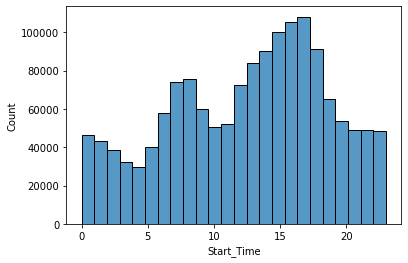

In [19]:
sns.histplot(new_df['Start_Time'].dt.hour, bins=24, kde=False)
# As you can see from 6-9 am there are a fair amount of accidents because that is the time people leave to work
# From 3-6 pm most accidents happen because people leave from work and more traffic

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

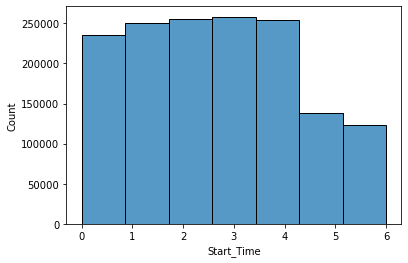

In [20]:
sns.histplot(new_df['Start_Time'].dt.dayofweek, bins=7, kde=False)
# In the plot, it shows most accident happens on week days instead of weekends because people go to work 

## Q4
### What month has the most accidents and why?

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

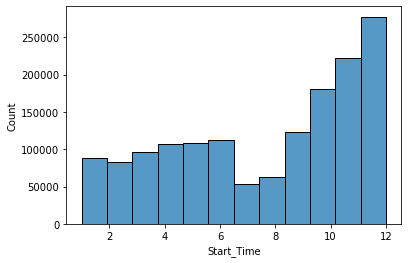

In [21]:
sns.histplot(new_df['Start_Time'].dt.month, bins=12, kde=False)
# Most accidents happens in December
# My reason for this is because of Christmas 

## Q6
### What year has the most accidents?

<AxesSubplot:xlabel='Start_Time', ylabel='count'>

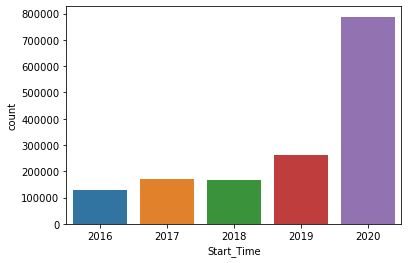

In [22]:
sns.countplot(x=new_df['Start_Time'].dt.year)
# 2020 seems to have the most accidents

## Q7
### Why is new york not recorded in this data?

#### New York has the highest population in the US but was not recorded into this Data Frame, New York either has very little accidents or it was meant to be left out

## Q8
### What was the longest accident recorded?

In [23]:
new_df.head()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0


In [24]:
new_df['End_Time'] = pd.to_datetime(new_df['End_Time'])

<ipython-input-24-05cb47e4ec4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['End_Time'] = pd.to_datetime(new_df['End_Time'])


In [25]:
time_df = new_df

In [26]:
time_df
# I cloned another dataframe using new_df

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,City,Temperature(F)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,Dublin,42.1
1,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,Dayton,36.9
2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,Cincinnati,36.0
3,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,Cincinnati,36.0
4,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,Akron,39.0
...,...,...,...,...,...,...,...,...
1516059,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,Riverside,86.0
1516060,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,San Diego,70.0
1516061,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,Orange,73.0
1516062,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,Culver City,71.0


In [27]:
time_df['Start_Time'] = time_df['Start_Time'].dt.time
# I only want the time, not the date

<ipython-input-27-adfdefceb1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['Start_Time'] = time_df['Start_Time'].dt.time


In [28]:
time_df['End_Time'] = time_df['End_Time'].dt.time

<ipython-input-28-03e05e85a38e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['End_Time'] = time_df['End_Time'].dt.time


In [29]:
#Drop unecessary columns
time_df = time_df.drop(time_df.columns[[2,3,4,5,6,7]], axis=1)

In [30]:
time_df.sort_values(by=['Start_Time','End_Time'], ascending=False)

,Start_Time,End_Time
1122313,23:59:59,00:28:42
1122314,23:59:59,00:28:42
401376,23:59:58,03:45:00
942684,23:59:58,00:29:58
942685,23:59:58,00:29:58
...,...,...
816966,00:00:00,00:31:33
1178130,00:00:00,00:29:40
815378,00:00:00,00:23:49
1311881,00:00:00,00:00:00


## Q9
### Instead of the temperature, did the weather conditions cause some of the accidents?

In [31]:
weather = df['Weather_Condition'].value_counts().reset_index()

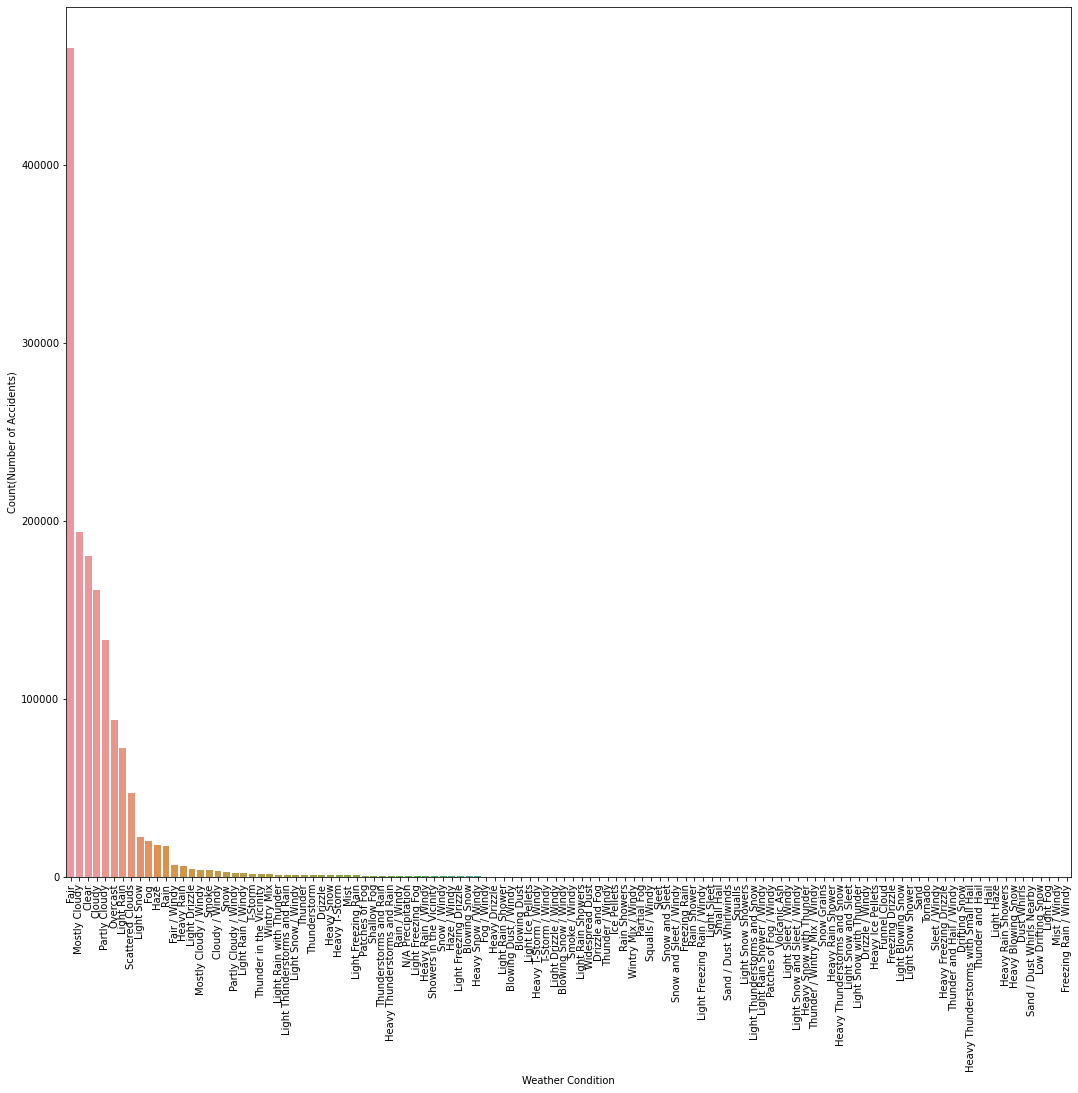

In [32]:
plt.figure(figsize=(18,16))
sns.barplot(x=weather['index'], y=weather['Weather_Condition'])
plt.xlabel("Weather Condition")
plt.ylabel("Count(Number of Accidents)")
plt.xticks(rotation=90)
plt.show()
# over 400 000 accidents happend in normal weather condititons which means Weather Conditions did not cause accidents!

## Q10
### Were most accidents caused in the day or night

In [38]:
labels = ['Day', 'Night']

In [36]:
df['Sunrise_Sunset'].value_counts()

Day      909838
Night    606143
Name: Sunrise_Sunset, dtype: int64

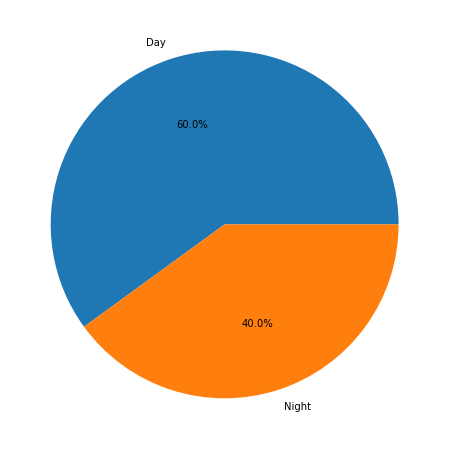

In [40]:
plt.figure(figsize=(10,8))
plt.pie(df['Sunrise_Sunset'].value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()
# As you can see, most accidents happened during the day

## Q10.2
### What is the Severity count?

In [42]:
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [43]:
num = [1,2,3,4]

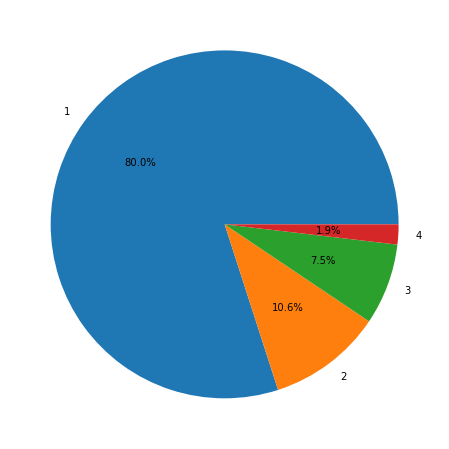

In [44]:
plt.figure(figsize=(10,8))
plt.pie(df['Severity'].value_counts(), autopct='%1.1f%%', labels=num)
plt.show()
# 80 % of the accidents had low impacts, and 1,9 % of the accidents had a fatal crash/ accident

In [1]:
# Insights:
# I have left some columns because they were not needed for this analysis
# I made some distplot/ histograms using the value counts/ accidents for some columns to briefly explain whats going on
# I made research and found that New York has the highest population in the US but was not recorded into this dataframe
# My explination for this is that New York has very little accidents or it was meant to be left out
# I had to convert the date and times to the correct format to continue the analysis for it
# Many null values were found in the temperature columns so it would be useless to drop it
# As you can see in question 8 , it is impossible to find the longest accident because it contains over 1 million row/times
# Most of the accidents happened during the day
# 80 % of the accidents had low impact (phew (づ｡◕‿‿◕｡)づ )